## Sampling Minority Oversample Technique

### 1. Import necessary libraries

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from collections import Counter

### 2. Read the dataset <br>
> In my case, I chose the Gender Classification dataset from https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset <br> <br>
> The goal of this dataset is to classify a gender if it is a male or female based on the facial features. <br><br>
> As you can below, there are 8 features which represents as the column of the dataset. The following are: <br><br>
>- longhair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
>- foreheadwidthcm - This column is in CM's. This is the width of the forehead.
>- foreheadheightcm - This is the height of the forehead and it's in Cm's.
>- nosewide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
>- noselong - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
>- lipsthin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
>- distancenosetoliplong - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".
>- gender - This is either "Male" or "Female".

In [57]:
df = pd.read_csv('Gender.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


### 3. Get the shape of the dataset <br>
> The dataset is composed of 5001 rows and 8 columns.

In [58]:
df.shape

(5001, 8)

### 4. Convert the gender column to 1's and 0's <br>
> We need to convert the data in gender column in order to run to codes properly. Since the rest of the columns are represented by numbers, the gender column should be converted also to numbers to avoid error in the next processes.

In [49]:
df['gender']=np.where(df['gender']=="Male",1,0)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


### 5. Counter Method <br>
> We will show how many 0's and 1's we have in the gender column to check if we have an imbalanced dataset. <br><br>
> Based on the results, there are 2,501 females and 2,500 males in the dataset. There is a minimal difference in the dataset. However, we can still apply imbalanced dataset using oversampling to make our dataset equal.

In [50]:
print(sorted(Counter(df['gender']).items()))

[(0, 2501), (1, 2500)]


### 6. Assigning the 1's and 0's <br>
> Here we assigned 1 to male and 0 to female. <br> <br>
> Results showed that there are 2,500 rows of male and 2,500 rows of female in the dataset. It also showed the number of columns which is 8, and the total numbers of rows which is 5,001.

In [51]:
male = df[df['gender']==1]
female = df[df['gender']==0]

In [52]:
print(male.shape,female.shape,df.shape)

(2500, 8) (2501, 8) (5001, 8)


### 7. Create dataframes <br>
> The X variable with hold the rest of the columns while the Y variable will hold the gender column.

In [53]:
X = df
Y = df['gender']

### 8. Apply the oversampling technique in the imbalanced dataset

In [54]:
from imblearn import over_sampling

In [55]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)

[(0, 2501), (1, 2501)] (5002,)


## CONCLUSION: <br>
>As you can see, after applying the oversampling technique in the dataset, it became equal. Both gender, the male and female, is now composed of 2,501 rows and the total of rows became 5,002.

## Testing the Independent Variables (Chi-Sqaure)

### 1. Read the dataset

In [60]:
df = pd.read_csv('Gender.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


### 2. Check the info of the dataset. <br>
> This shows a more detailed analysis of our dataset. This includes the information of each columns and more.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


### 3. Selecting category features <br>
> In my case, I include all the columns with values 1's and 0's. I also include the gender column since it will be the basis of the other included columns.

In [62]:
df=df[["long_hair", "nose_wide", "nose_long", "lips_thin", "distance_nose_to_lip_long", "gender"]]
df.head()

,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,1,0,1,1,Male
1,0,0,0,1,0,Female
2,0,1,1,1,1,Male
3,0,0,1,1,1,Male
4,1,0,0,0,0,Female


### 4. Performing Label Encoding <br>
> This process is important before applying the Chi-square test. This will only be applied to columns which are no in 1's and 0's like the gender column.

In [63]:
df['gender']=np.where(df['gender']=="Male",1,0)
df.head()

C:\Users\Florence\AppData\Local\Temp\ipykernel_19136\4200569572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=np.where(df['gender']=="Male",1,0)


,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,1,0,1,1,1
1,0,0,0,1,0,0
2,0,1,1,1,1,1
3,0,0,1,1,1,1
4,1,0,0,0,0,0


### 5. Train Test Split <br>
> This process will help to avoid overfitting the dataset. <br><br>
> The independent features are long_hair, nose_wide, nose_long, lips_thin, distance_nose_to_lip_long. <br><br>
> The dependent feature is gender.

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[["long_hair", "nose_wide", "nose_long", "lips_thin", "distance_nose_to_lip_long"]],
                                              df['gender'],test_size=0.3,random_state=100)

In [66]:
X_train.head()

,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
4967,1,1,1,1,1
4087,1,0,1,1,1
2882,1,1,1,1,0
1237,1,0,1,1,1
1429,1,1,1,1,1


### 6. Perform Chi-square Test <br>
> In performing chi-square test, it returns two values: F-score and P-value. <br><br>
> F-score values needs to be higher. The more the higher the value of F-score, the more important the feature.<br><br>
> In P-value, the lesser the value, the more important the feature is.

In [67]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [68]:
f_p_values

(array([3.43990291e-02, 1.00761315e+03, 9.43291422e+02, 9.78899582e+02,
        9.59972856e+02]),
 array([8.52860603e-001, 3.97600911e-221, 3.81090566e-207, 6.93082621e-215,
        9.01368158e-211]))

In [69]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

long_hair                     8.528606e-01
nose_wide                    3.976009e-221
nose_long                    3.810906e-207
lips_thin                    6.930826e-215
distance_nose_to_lip_long    9.013682e-211
dtype: float64

In [71]:
p_values.sort_index(ascending=False)

nose_wide                    3.976009e-221
nose_long                    3.810906e-207
long_hair                     8.528606e-01
lips_thin                    6.930826e-215
distance_nose_to_lip_long    9.013682e-211
dtype: float64

## CONCLUSION: <br>
> Based on the result, the nose wide column is the most important column among the other features that can help to classify the gender of a person if it is male or female.

## Correlation

### 1. Read the dataset

In [73]:
df = pd.read_csv('Gender.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


### 2. Get the correlation <br>
> Rule: If the value is close to 0, it means it is not much correlated. If the value is close to 1, it is highly correlated. However, if the value is negative, it is inversely correlated. <br><br>
> Based on the result, the 8 featues got 1 values. However, it is not much correlated if paired with other features.

In [52]:
df.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


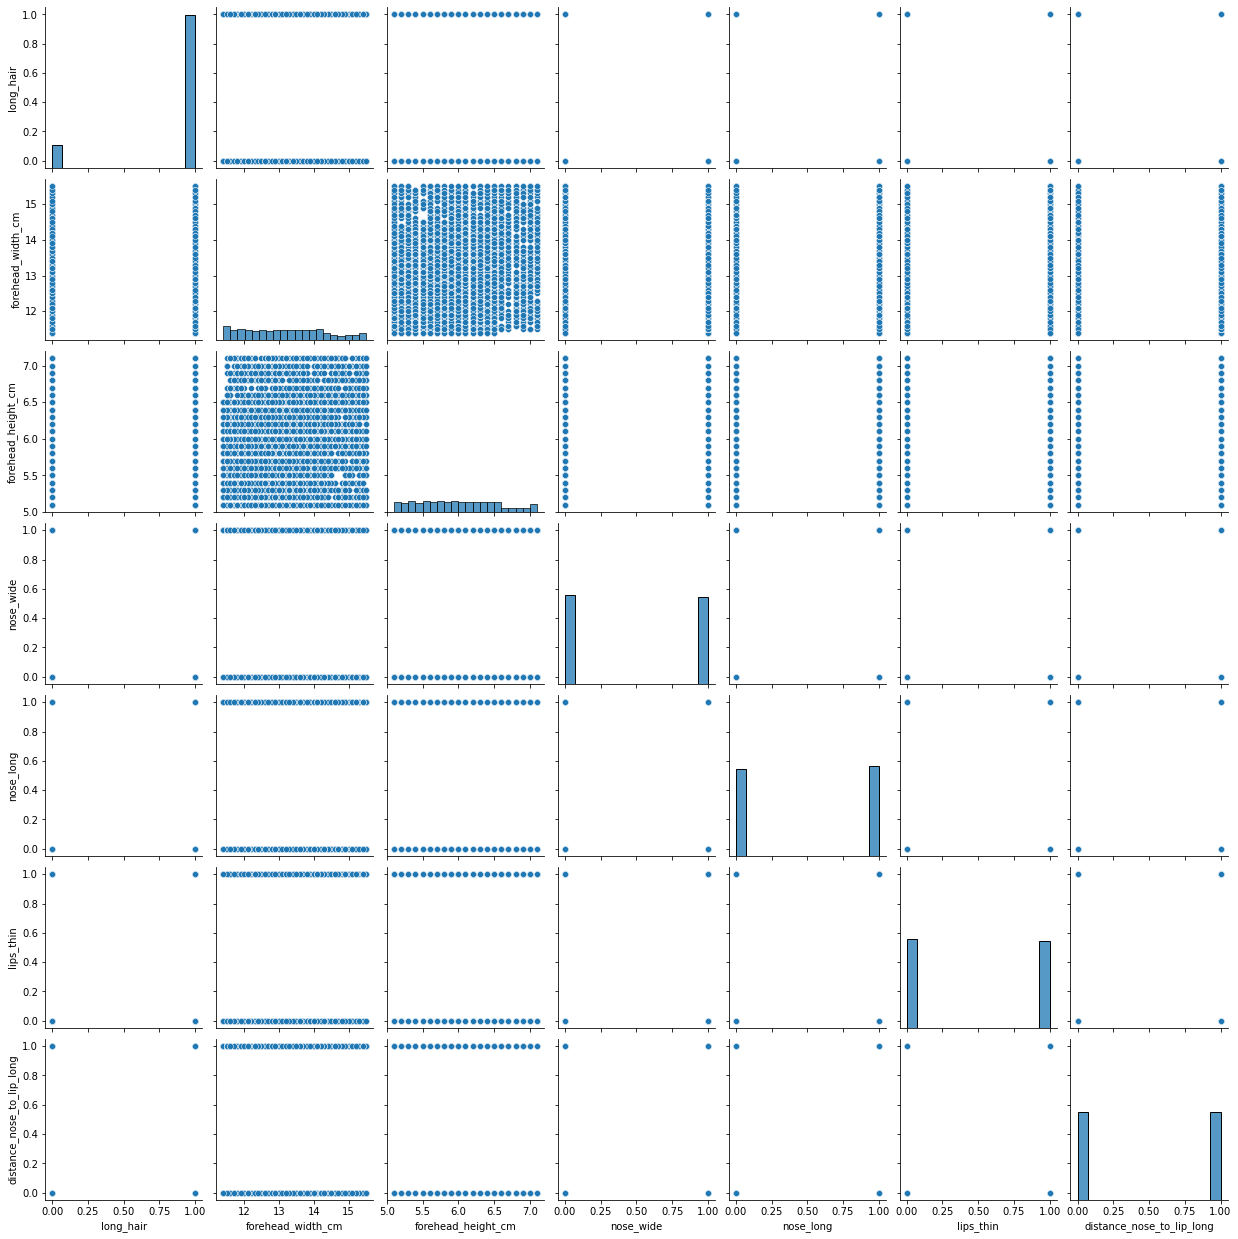

In [53]:
sns.pairplot(df)

## Linear Regression Model

### 1. Read the dataset

In [3]:
df = pd.read_csv('Gender.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


### 2. Convert gender column to 1's and 0's <br>
> Male = 1 and Female = 0

In [6]:
df['gender']=np.where(df['gender']=="Male",1,0)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


### 3. Assign the X variables <br>
> In my case, the x variables are long hair, forehead width cm, forehead height cm, nose wide, nose long, lips thin, and distance  nose to lip long.

In [8]:
X = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin','distance_nose_to_lip_long']]
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


### 4. Assign the Y variable <br>
> For this dataset, the Y variable is gender

In [9]:
y = df['gender'] 
y.head()

0    1
1    0
2    1
3    1
4    0
Name: gender, dtype: int32

### 5. Import the Linear Regression and Cross_val_score libraries

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

### 6. Applying the Cross validation <br>
> In this process, the cross validation will be done and a mean squared error will de displayed. <br><br>
> The cross validation is essential to estimate the accuracy or the performance of the model. <br><br>
> The Mean Squared Error is used to measure the regression model. The rules is, the lower the value, the better is the fitting of the model. <br><br>

In [13]:
mregressor = LinearRegression()
mse = cross_val_score(mregressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mse)
print(mean_mse)

[-0.04230251 -0.04177348 -0.03446616 -0.04107956 -0.03805031]
-0.03953440387433605


### 7. Splitting the data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### 8. Building the Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
mregressor = LinearRegression()
mregressor.fit(X_train,y_train)

LinearRegression()

> These values shows the linear regression prediction model values of the 20%

In [17]:
y_pred = mregressor.predict(X_test)
y_pred

array([-0.09915724,  1.0117175 ,  0.73142355, ..., -0.06069383,
        1.02780351, -0.03339846])

> The values below shows the difference of the linear prediction model versus the actual label values

In [20]:
variance = (y_pred-y_test)
variance

2373   -0.099157
2755    0.011718
2265   -0.268576
3901   -0.061244
3175   -0.068801
          ...   
3861    0.059425
2807    0.067682
1367   -0.060694
1141    0.027804
4229   -0.033398
Name: gender, Length: 1001, dtype: float64

### 9. Visualization of result

D:\Florence\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gender', ylabel='Density'>

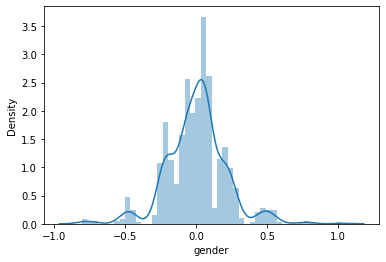

In [21]:
sns.distplot(y_test-y_pred)

### 10. Displaying the mean value and score of the testing model

In [22]:
diff = np.mean(variance)
diff

-0.0024722459559944347

> As we can see, the test model got an 82% score. This is already a good score for a testing model.

In [23]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.8281094535884441

### 11. Displaying the training model 

In [25]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 gender   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              8036.
Date:                Fri, 21 Oct 2022   Prob (F-statistic):                        0.00
Time:                        19:34:51   Log-Likelihood:                          905.52
No. Observations:                5001   AIC:                                     -1797.
Df Residuals:                    4994   BIC:                                     -1751.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
long_hair                    -0.0331      0.008     -3.953      0.000      -0.049      -0.017
forehead_width_cm            -0.0009      0.002     -0.465      0.642      -0.005       0.003
forehead_height_cm           -0.0019      0.004     -0.453      0.651      -0.010       0.006
nose_wide                     0.2949      0.008     38.233      0.000       0.280       0.310
nose_long                     0.2662      0.008     34.626      0.000       0.251       0.281
lips_thin                     0.2660      0.008     34.656      0.000       0.251       0.281
distance_nose_to_lip_long     0.2835      0.008     36.646      0.000       0.268       0.299
==============================================================================
Omnibus:                      215.304   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.051
Skew:                           0.071   Prob(JB):                    4.34e-152
Kurtosis:                       4.824   Cond. No.                         44.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CONCLUSION: <br>
> Based on the results shown above, the testing model got 82% while the training model got 91%. These scores means that there is an overfitting happened in the dataset. To fix this problem, ridge or lasso regression must be applied to minimize the error.

## Ridge Regression Model

### 1. Import all the necessary libraries

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

### 2. Applying the alpha parameters <br>
> This will help to determine the best value of the dataset.

In [27]:
ridge = Ridge()
parameters = {'alpha':[1e-10,1e-8,1e-2,1,5,10,15,20,25,30,35,40,45,55,60,65,70,75,80,85,90,95,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 0.01, 1, 5, 10, 15, 20, 25, 30,
                                   35, 40, 45, 55, 60, 65, 70, 75, 80, 85, 90,
                                   95, 100]},
             scoring='neg_mean_squared_error')

> Based on the result, the best alpha parameter that is given is -0.0395337032438925

In [28]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-0.0395337032438925


### 3. Splitting the data

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### 4. Displaying the ridge predictive model

In [32]:
predict_ridge = ridge_regressor.predict(X_test)
predict_ridge

array([-0.09700926,  1.00844469,  0.73792932, ..., -0.05558231,
        1.02495349, -0.03342724])

### 5. Difference between the ridge predictive values versus the actual label values

In [33]:
variance1 = (y_pred-y_test)
variance1

2373   -0.099157
2755    0.011718
2265   -0.268576
3901   -0.061244
3175   -0.068801
          ...   
3861    0.059425
2807    0.067682
1367   -0.060694
1141    0.027804
4229   -0.033398
Name: gender, Length: 1001, dtype: float64

### 6. Visualization of the result

D:\Florence\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gender', ylabel='Density'>

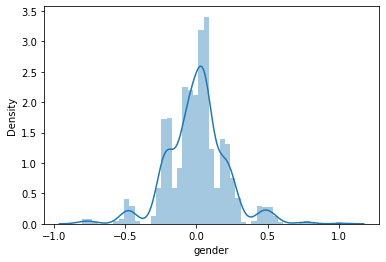

In [34]:
import seaborn as sns
sns.distplot(y_test-predict_ridge)

### 7. Mean value of the predicted model versus the actual data

In [35]:
diff2 = np.mean(variance1)
diff2

-0.0024722459559944347

## Lasso Regression Model

### 1. Import all the necessary libraries

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### 2. Applying the alpha parameters

In [40]:
lasso = Lasso()
parameters = {'alpha':[1e-10,1e-8,1e-2,1,5,10,15,20,25,30,35,40,45,55,60,65,70,75,80,85,90,95,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-08, 0.01, 1, 5, 10, 15, 20, 25, 30,
                                   35, 40, 45, 55, 60, 65, 70, 75, 80, 85, 90,
                                   95, 100]},
             scoring='neg_mean_squared_error')

In [41]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-10}
-0.03953440387440869


### 3. Splitting the data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### 4. Displaying the lasso predictive model

In [43]:
predict_lasso = lasso_regressor.predict(X_test)
predict_lasso

array([-0.09764821,  1.00951717,  0.73825193, ..., -0.05648819,
        1.02593945, -0.03411775])

### 5. Mean value of the predicted model versus the actual data

In [44]:
diff2 = np.mean(predict_lasso)
diff2

0.48062531810809084

### 6. Visualization of the result

D:\Florence\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gender', ylabel='Density'>

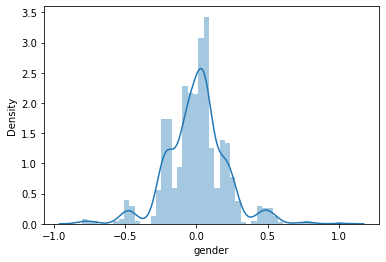

In [45]:
sns.distplot(y_test-predict_lasso)

## CONCLUSION: <br>
> As seen on the model of linear regression, there's some overfitting issue since the the score of training model which is 91% while the testing model got only 82%. To address this problem, the Ridge and Lasso Regression was applied. <br><br>
> Based on the results, the Lasso Regression model performed better thean Ridge Regression Model by having a score of 0.48, which is closest to 1. As we can see also in the graph, it shows improvement compared to the graph in Linear Regression model.